In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
obs=pd.read_csv('gauge.csv',sep=',')
obs.head()

,Fecha,chusis,chalaco,huamarca,huancabamba,miraflores
0,1980-01-01,0.0,0.0,0.4,2.1,0.0
1,1980-01-02,0.0,0.0,0.0,0.0,0.0
2,1980-01-03,0.0,0.0,0.0,1.5,0.0
3,1980-01-04,0.0,0.0,0.0,0.0,0.0
4,1980-01-05,0.0,0.0,0.0,0.0,0.0


In [4]:
# Convert 'Fecha' column to datetime
obs['Fecha'] = pd.to_datetime(obs['Fecha'])

# Set 'Fecha' as the index
obs.set_index('Fecha', inplace=True)

# Resample to monthly, applying a condition to return NaN if any value is missing in a month
monthly_data = obs.resample('M').apply(
    lambda x: x.sum() if x.notna().all() else pd.NA
)


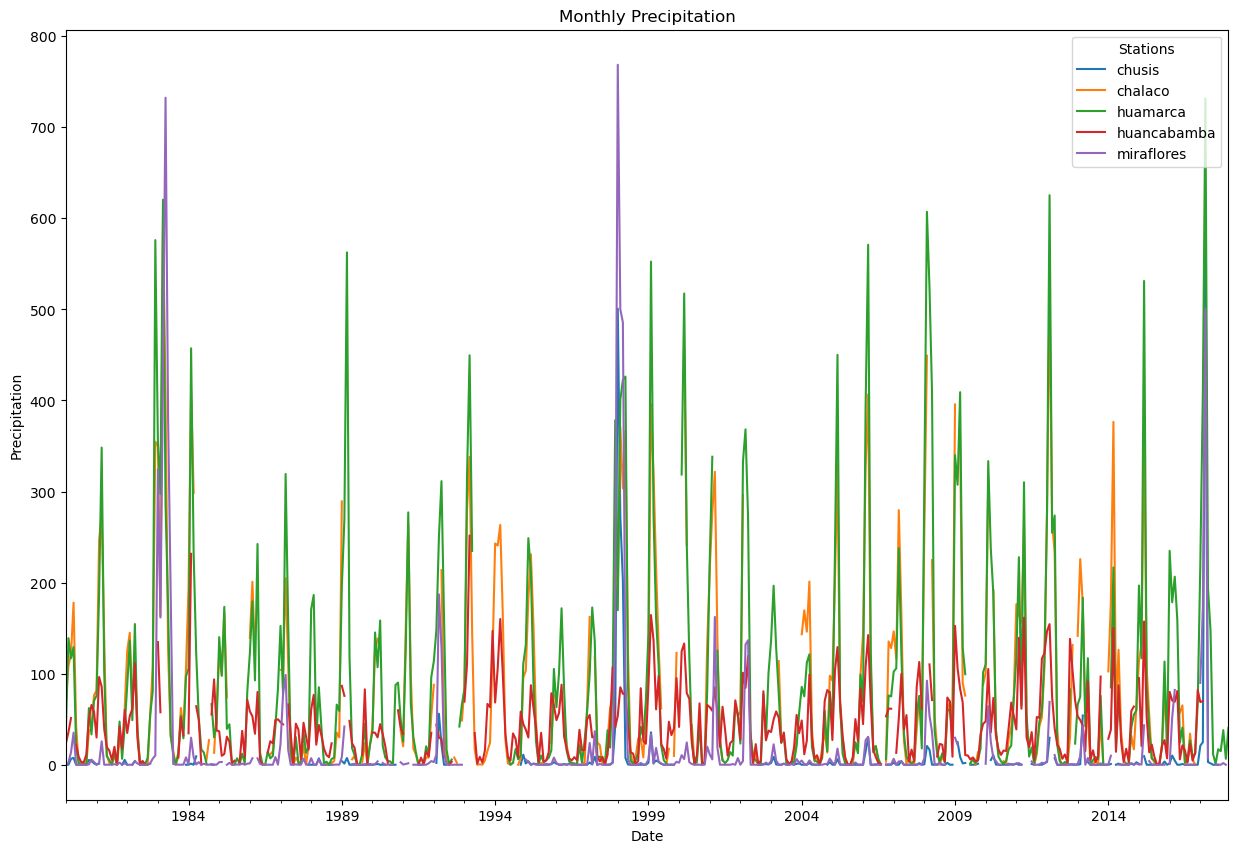

In [9]:
# Replace pd.NA with NaN for plotting
plot_data = monthly_data.replace({pd.NA: np.nan})

# Plot the data
plot_data.plot(figsize = (15,10))
plt.title("Monthly Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.legend(title="Stations")
plt.show()

In [10]:
plot_data.describe()

,chusis,chalaco,huamarca,huancabamba,miraflores
count,305.000000,365.000000,427.000000,405.000000,398.000000
mean,7.800984,85.395342,91.103981,42.845432,18.686181
std,49.493206,109.523783,128.455958,39.411589,78.976276
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000,6.500000,10.600000,0.000000
50%,0.000000,37.500000,38.700000,34.000000,0.300000
75%,1.200000,126.200000,117.300000,63.200000,3.375000
max,612.600000,600.900000,731.600000,251.500000,768.700000


In [11]:
plot_data.to_excel('datos.xlsx',index=True)

In [13]:
plot_data.shape

(456, 5)